In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/10_Que_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,14.0533,14.5264,14.3738,14.2975,14.2364,14.6942,14.8163,14.9231,14.6179,14.8773,...,16.1896,16.0522,16.5558,15.9760,14.9841,15.5334,16.0522,15.8844,15.9149,0Ca/10Que
1,15.7013,15.1520,15.4877,15.2435,15.1520,15.1825,15.9302,15.7776,15.2283,15.6708,...,16.7541,16.4947,16.2659,16.0370,15.4114,15.6708,15.5640,15.6860,16.0980,0Ca/10Que
2,15.3503,15.2130,15.6555,16.1133,15.8997,16.4947,16.8152,16.4337,15.3198,15.1978,...,15.1672,15.3198,15.3198,14.9536,15.2435,15.6097,15.1062,15.4419,14.9994,0Ca/10Que
3,15.2435,15.6097,16.1591,16.0065,15.4419,15.3961,15.8539,14.9841,14.7858,15.3198,...,15.9454,15.6097,15.7471,15.8234,15.2130,15.2283,15.8081,15.4114,15.5029,0Ca/10Que
4,15.4877,14.8621,14.6790,15.7318,15.8844,15.1825,15.2588,15.0909,15.4724,16.5100,...,15.2130,15.4419,15.9302,16.6626,15.9760,15.3961,15.8081,15.5945,14.8010,0Ca/10Que


In [4]:
df.target.unique()

array(['0Ca/10Que', '10Ca/10Que', '100Ca/10Que'], dtype=object)

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,14.0533,14.5264,14.3738,14.2975,14.2364,14.6942,14.8163,14.9231,14.6179,14.8773,...,16.1896,16.0522,16.5558,15.9760,14.9841,15.5334,16.0522,15.8844,15.9149,0
1,15.7013,15.1520,15.4877,15.2435,15.1520,15.1825,15.9302,15.7776,15.2283,15.6708,...,16.7541,16.4947,16.2659,16.0370,15.4114,15.6708,15.5640,15.6860,16.0980,0
2,15.3503,15.2130,15.6555,16.1133,15.8997,16.4947,16.8152,16.4337,15.3198,15.1978,...,15.1672,15.3198,15.3198,14.9536,15.2435,15.6097,15.1062,15.4419,14.9994,0
3,15.2435,15.6097,16.1591,16.0065,15.4419,15.3961,15.8539,14.9841,14.7858,15.3198,...,15.9454,15.6097,15.7471,15.8234,15.2130,15.2283,15.8081,15.4114,15.5029,0
4,15.4877,14.8621,14.6790,15.7318,15.8844,15.1825,15.2588,15.0909,15.4724,16.5100,...,15.2130,15.4419,15.9302,16.6626,15.9760,15.3961,15.8081,15.5945,14.8010,0


# Tree based algorithms

In [6]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [8]:
dtc = DecisionTreeClassifier(max_depth=5, 
                             max_leaf_nodes=6, min_samples_leaf=3)

 CV Scores: [0.76243094 0.78453039 0.77348066 0.73756906]
 CV Mean score: 0.7645027624309392


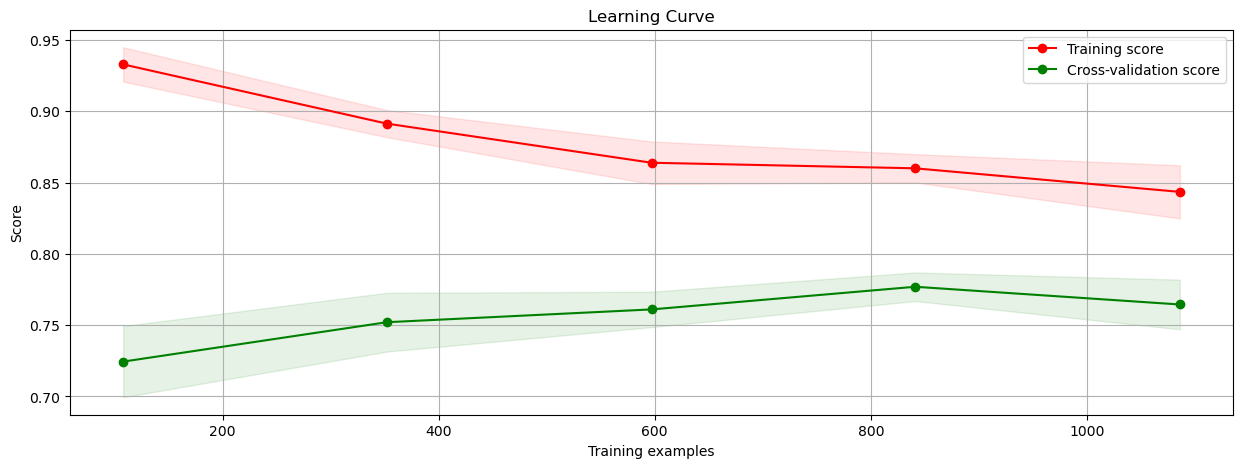

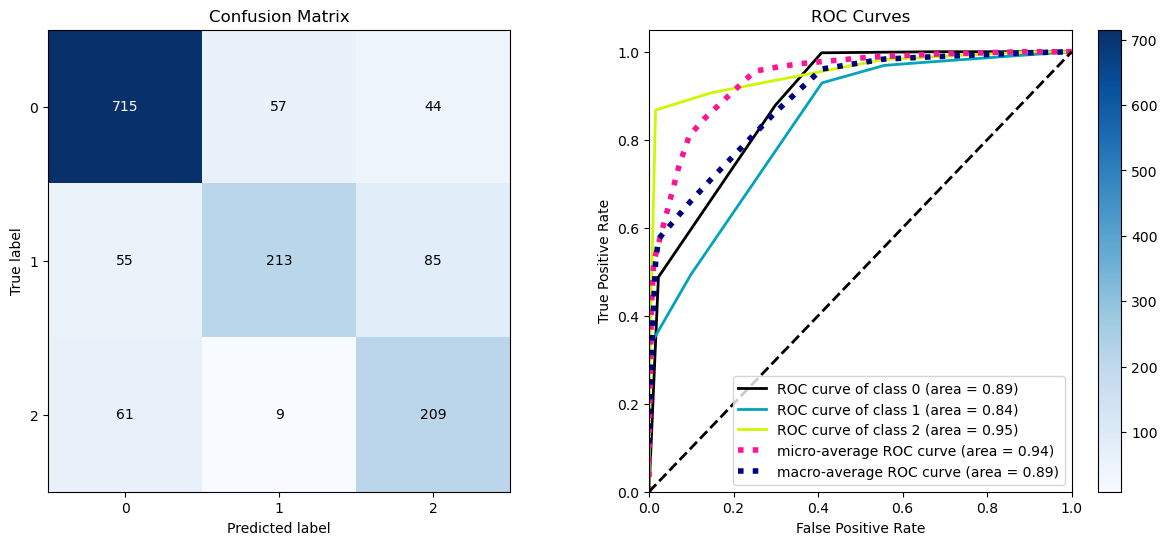

In [9]:
run_model(dtc, X_train, y_train)

In [10]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=3)

In [11]:
dtc_pred = dtc.predict(X_test)

In [12]:
f1_score(y_test, dtc_pred, average='weighted')

0.7384824643983394

In [13]:
accuracy_score(y_test, dtc_pred)

0.7741046831955923

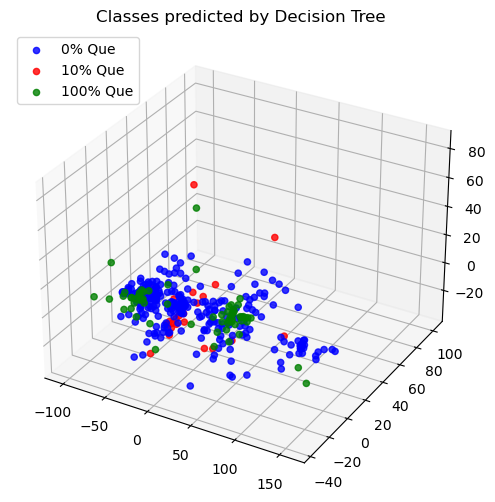

In [14]:
draw_classes_scatterplot(X_test, dtc_pred, "Classes predicted by Decision Tree",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Random Forest Classifer

In [15]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=5, 
                             max_leaf_nodes=6, min_samples_leaf=3)

 CV Scores: [0.82044199 0.8480663  0.85911602 0.80110497]
 CV Mean score: 0.8321823204419889


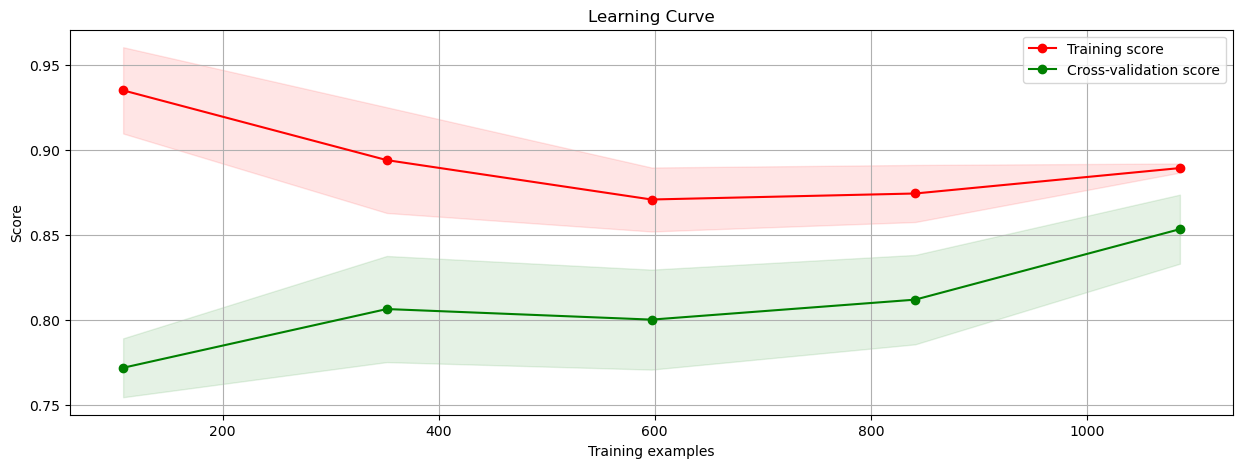

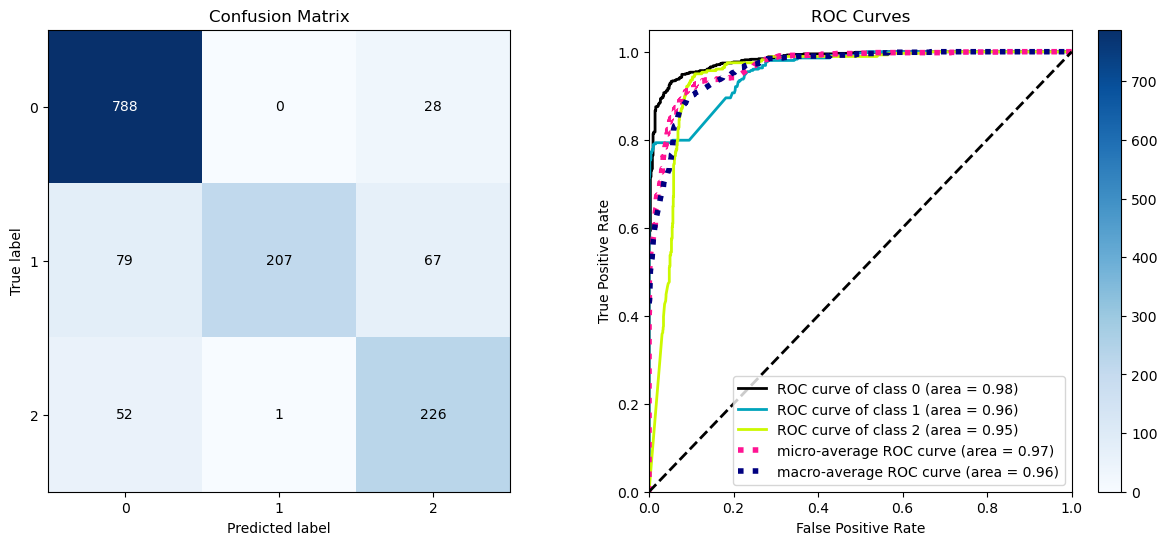

In [16]:
run_model(rfc, X_train, y_train)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=3,
                       n_estimators=10)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
f1_score(y_test, rfc_pred, average='weighted')

0.8536585468701897

In [20]:
accuracy_score(y_test, rfc_pred)

0.859504132231405

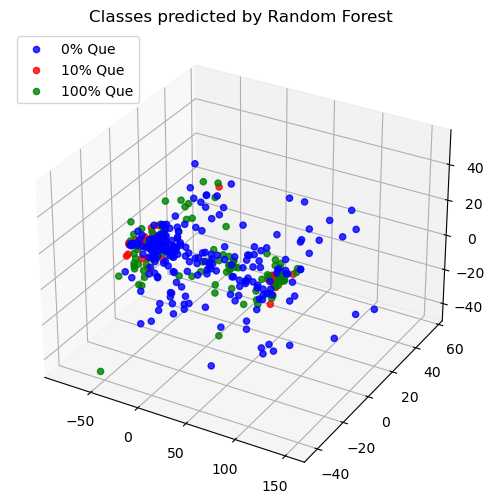

In [21]:
draw_classes_scatterplot(X_test, rfc_pred, "Classes predicted by Random Forest",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Light GBM Classifier

In [22]:
lgbm = LGBMClassifier(n_estimators=6, max_depth=3, 
                             num_leaves=6, min_child_samples=3)

 CV Scores: [0.81767956 0.84530387 0.83425414 0.74861878]
 CV Mean score: 0.8114640883977902


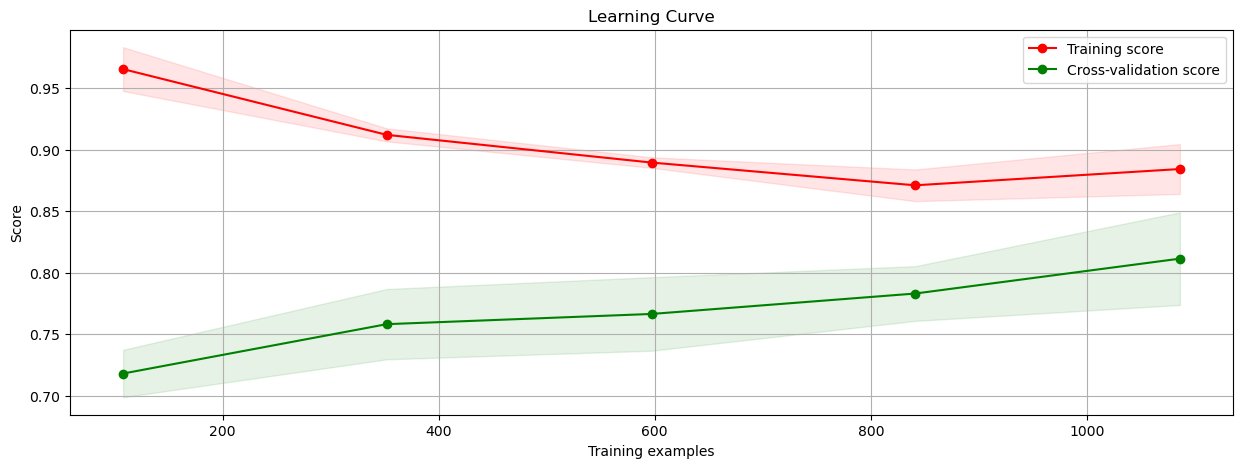

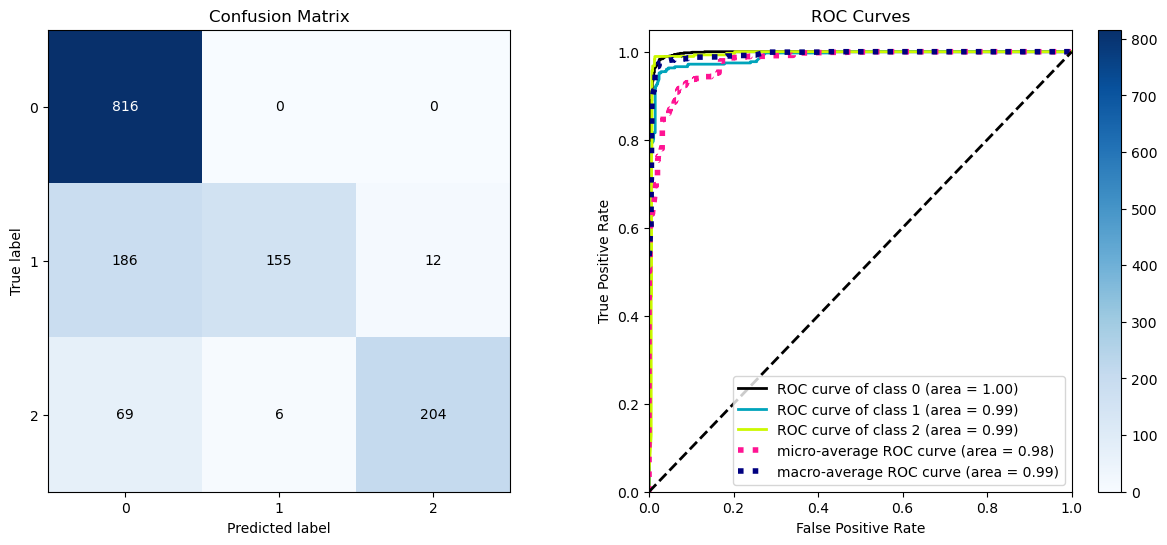

In [23]:
run_model(lgbm, X_train, y_train)

In [24]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=3, n_estimators=6, num_leaves=6)

In [25]:
lgbm_pred = lgbm.predict(X_test)

In [26]:
f1_score(y_test, lgbm_pred, average='weighted')

0.7812237536560815

In [27]:
accuracy_score(y_test, lgbm_pred)

0.7988980716253443

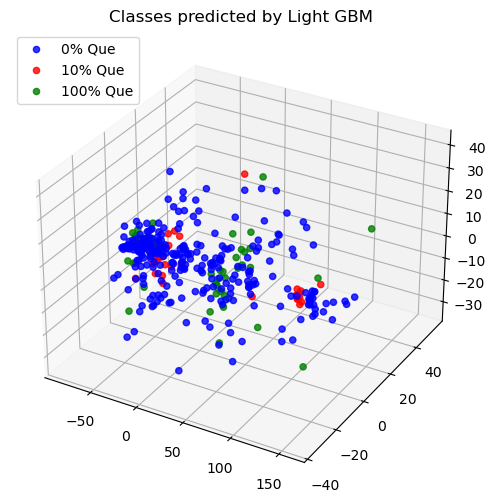

In [28]:
draw_classes_scatterplot(X_test, lgbm_pred, "Classes predicted by Light GBM", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Time Series Forest Classifier

In [29]:
tsf = TimeSeriesForest(n_estimators=10, max_depth=3, 
                             max_leaf_nodes=6, min_samples_leaf=3)

 CV Scores: [0.87845304 0.82872928 0.88121547 0.85635359]
 CV Mean score: 0.8611878453038674


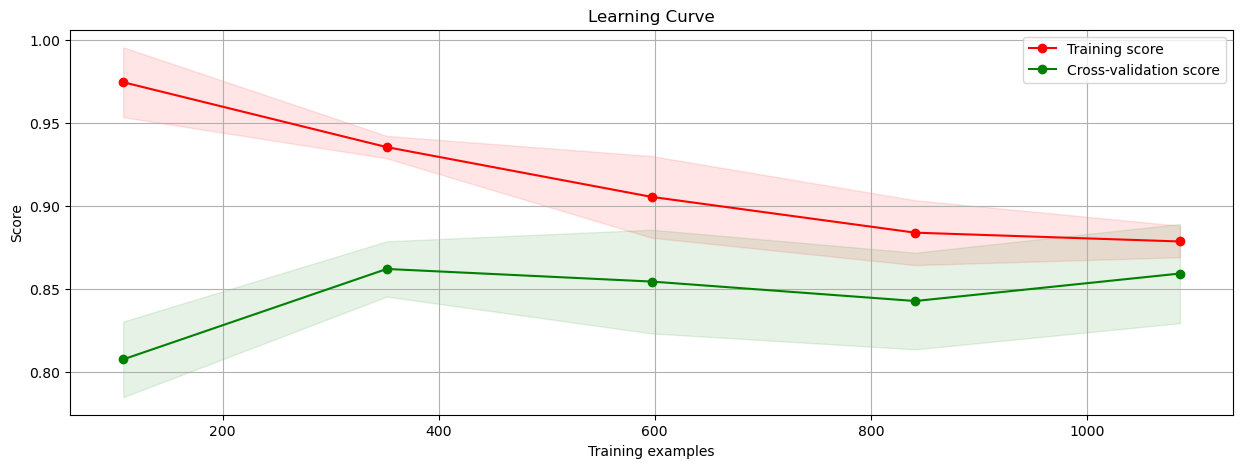

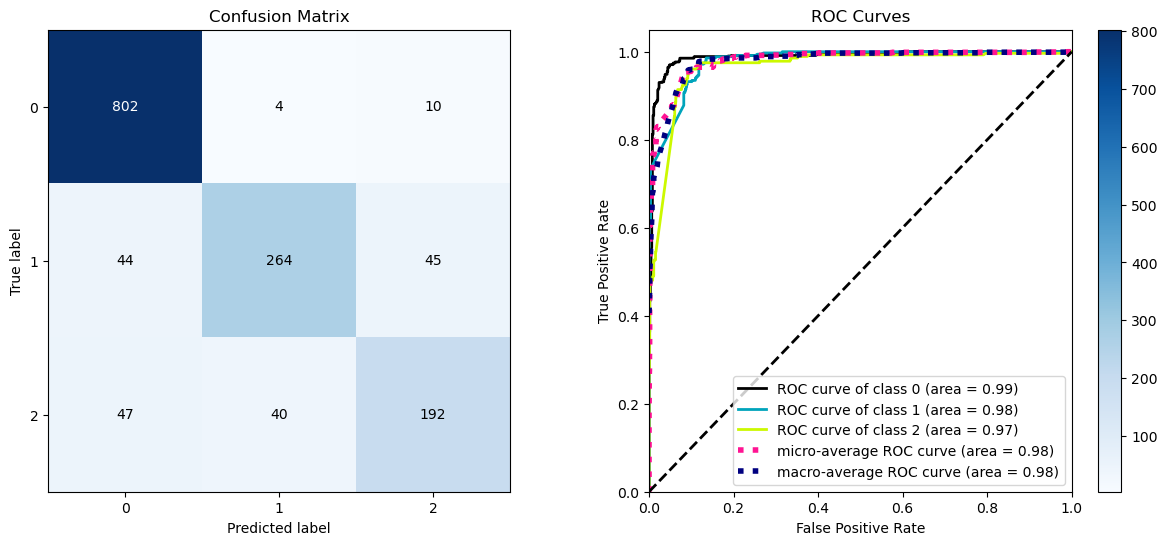

In [30]:
run_model(tsf, X_train, y_train)

In [31]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=3, max_leaf_nodes=6, min_samples_leaf=3,
                 n_estimators=10)

In [32]:
tsf_pred = tsf.predict(X_test)

In [33]:
f1_score(y_test, tsf_pred, average='weighted')

0.8806026446931743

In [34]:
accuracy_score(y_test, tsf_pred)

0.8842975206611571

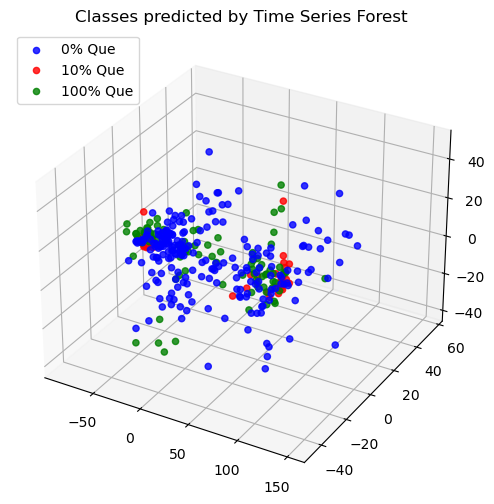

In [35]:
draw_classes_scatterplot(X_test, tsf_pred, "Classes predicted by Time Series Forest", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])